# PRÁTICA GUIADA: Regressão Logística.

## 1. Introdução

Este dataset sobre câncer de mama foi obtido com o [Hospital da Universidade de Wisconsin](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). São dados gerados na década de 90, que contém informações de estudos clínicos e celulares. O objetivo é prever o caráter benigno ($class_t=0$) maligno ($class_t=1$) do câncer com base em uma série de preditores de nível celular.

* o atributo `class_t` é a variável target.

* Os demais atributos são variáveis descritivas com valores normalizados de 1 a 10.

- [`statsmodel`](https://www.statsmodels.org/stable/index.html)

In [1]:
### Importar os pacotes a serem usados
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
%pylab inline

Populating the interactive namespace from numpy and matplotlib


####  <span style = "color:red">Código Original.</span>
<!---
### Importar os pacotes a serem usados
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
%pylab inline
-->

#### Vamos começar importando os dados do arquivo `breast-cancer.csv`.

In [2]:
df = pd.read_csv('breast-cancer.csv', 
                 header = None
                )

df.columns = ['ID', 
              'clump_Thickness', 
              'unif_cell_size', 
              'unif_cell_shape', 
              'adhesion', 
              'epith_cell_Size', 
              'bare_nuclei', 
              'bland_chromatin ',
              'norm_nucleoli', 
              'mitoses', 
              'class_t' 
             ]

df.sample(10)

,ID,clump_Thickness,unif_cell_size,unif_cell_shape,adhesion,epith_cell_Size,bare_nuclei,bland_chromatin,norm_nucleoli,mitoses,class_t
493,1297327,5,1,1,1,2,1,1,1,1,2
292,653777,8,3,4,9,3,10,3,3,1,4
445,1268313,5,1,1,3,2,1,1,1,1,2
316,76389,10,4,7,2,2,8,6,1,1,4
237,1285531,1,1,1,1,2,1,3,1,1,2
678,776715,3,1,1,1,3,2,1,1,1,2
617,1253955,8,7,4,4,5,3,5,10,1,4
605,1096352,6,3,3,3,3,2,6,1,1,2
668,466906,1,1,1,1,2,1,1,1,1,2
293,659642,10,8,4,4,4,10,3,10,4,4


####  <span style = "color:red">Código Original.</span>
<!---
### Importamos os dados

df = pd.read_csv('breast-cancer.csv', header = None)
df.columns = ['ID', 'clump_Thickness', 'unif_cell_size', 
              'unif_cell_shape', 'adhesion', 'epith_cell_Size', 
              'bare_nuclei', 'bland_chromatin ','norm_nucleoli', 
              'mitoses', 'class_t'
             ]
df.sample(10)
-->

#### Podemos investigar a forma do dataframe que criamos.

In [3]:
df.shape

(683, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ID                683 non-null    int64
 1   clump_Thickness   683 non-null    int64
 2   unif_cell_size    683 non-null    int64
 3   unif_cell_shape   683 non-null    int64
 4   adhesion          683 non-null    int64
 5   epith_cell_Size   683 non-null    int64
 6   bare_nuclei       683 non-null    int64
 7   bland_chromatin   683 non-null    int64
 8   norm_nucleoli     683 non-null    int64
 9   mitoses           683 non-null    int64
 10  class_t           683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


####  <span style = "color:red">Código Original.</span>
<!---
df.shape
-->

#### Com a intenção de manter consistência, vamos subistituir valores de `2` e `4` para o atributo target `class_t` pelos valores `0` e `1`, respectivamente.

In [5]:
df['class_t'][df['class_t'] == 2] = 0
df['class_t'][df['class_t'] == 4] = 1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ID                683 non-null    int64
 1   clump_Thickness   683 non-null    int64
 2   unif_cell_size    683 non-null    int64
 3   unif_cell_shape   683 non-null    int64
 4   adhesion          683 non-null    int64
 5   epith_cell_Size   683 non-null    int64
 6   bare_nuclei       683 non-null    int64
 7   bland_chromatin   683 non-null    int64
 8   norm_nucleoli     683 non-null    int64
 9   mitoses           683 non-null    int64
 10  class_t           683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


####  <span style = "color:red">Código Original.</span>
<!---
df.class_t[df['class_t'] == 2] = 0
df.class_t[df['class_t'] == 4] = 1
-->

#### Vamos tomar uma amostra do dataset que coletamos.

In [7]:
df.sample(10)

,ID,clump_Thickness,unif_cell_size,unif_cell_shape,adhesion,epith_cell_Size,bare_nuclei,bland_chromatin,norm_nucleoli,mitoses,class_t
183,1208301,1,2,3,1,2,1,3,1,1,0
119,1174057,4,2,1,1,2,2,3,1,1,0
631,1311108,1,1,1,3,2,1,1,1,1,0
574,1272166,5,1,1,1,2,1,1,1,1,0
593,557583,5,10,10,10,10,10,10,1,1,1
86,1152331,4,1,1,1,2,1,3,1,1,0
129,1179818,2,1,1,1,2,1,3,1,1,0
586,1344449,1,1,1,1,1,1,2,1,1,0
20,1054590,7,3,2,10,5,10,5,4,4,1
671,566346,3,1,1,1,2,1,2,3,1,0


####  <span style = "color:red">Código Original.</span>
<!---
df.sample(10)
-->

## 2. Análise Exploratória dos Dados

#### Como estamos interessados apenas nos dados medidos e queremos realizar a previsão dos casos benignos e malígnos de câncer, vamos fazer uma análise descritiva e exploratória dos dados dos dados do dataset com excessão dos atributos `iD` e `class_t`.

#### Aqui vamos usar os métodos `.iloc[]` e `.describe()` para isso.

In [8]:
df.iloc[:,1:len(df)].describe()

,clump_Thickness,unif_cell_size,unif_cell_shape,adhesion,epith_cell_Size,bare_nuclei,bland_chromatin,norm_nucleoli,mitoses,class_t
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


####  <span style = "color:red">Código Original.</span>
<!---
df.iloc[:,1:len(df)].describe()
-->

#### Vamos observar a correlação entre os dados que separamos acima.

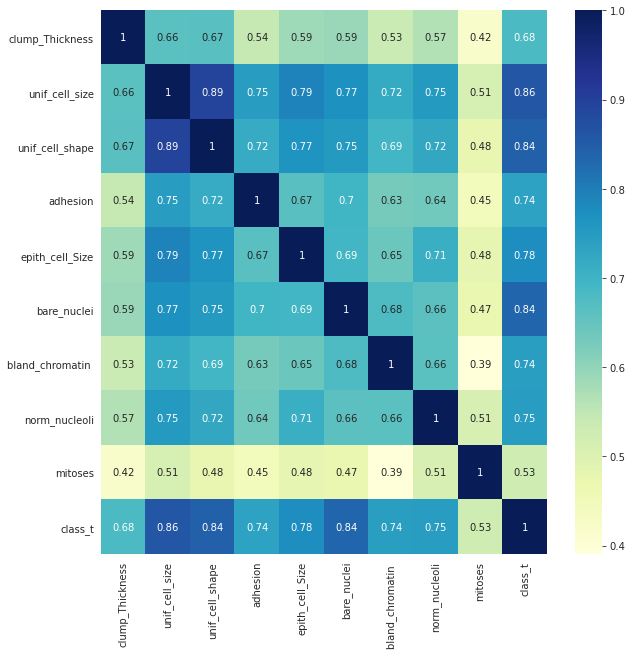

In [9]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize = (10, 10))
    ax = sns.heatmap(df.corr(method = 'spearman').iloc[1:len(df), 
                                                       1:len(df) ], 
            annot = True,
            cmap = "YlGnBu"
                    )

####  <span style = "color:red">Código Original.</span>
<!---
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(df.corr(method = 'spearman').iloc[1:len(df), 
                                                       1:len(df) ], 
            annot = True,
            cmap = "YlGnBu"
                    )
-->

## 3. Ajustando um modelo de regressão logística

#### Uma vez que estudamos a relação entre os atributo de nosso dataset, podemos pensar em dividí-lo entre os atributos descritivos  `X` e o target `y`.

In [10]:
X = df.iloc[:, 1 : 9]
y = df['class_t']
print(X)
#print(y)

     clump_Thickness  unif_cell_size  unif_cell_shape  adhesion  \
0                  5               1                1         1   
1                  5               4                4         5   
2                  3               1                1         1   
3                  6               8                8         1   
4                  4               1                1         3   
..               ...             ...              ...       ...   
678                3               1                1         1   
679                2               1                1         1   
680                5              10               10         3   
681                4               8                6         4   
682                4               8                8         5   

     epith_cell_Size  bare_nuclei  bland_chromatin   norm_nucleoli  
0                  2            1                 3              1  
1                  7           10                 3      

####  <span style = "color:red">Código Original.</span>
<!---
X = df.iloc[:, 1 : 9]
y = df['class_t']
print(X)
#print(y)
-->

### 3.1 Usando `scikit-learn`

#### Vamos primeiramente importar as bibliotecas necessárias para a geração do modelo de classificação:

- A bibliteca [`sklearn.model_selection.KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) parar separar os dados em `k` dobras e definir a estrategia de [validação cruzada](https://towardsdatascience.com/cross-validation-a-beginners-guide-5b8ca04962cd). observe os parâmetros `n_splits`, que define o [número de dobras](https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f) a serem utilizadas, os parâmetros `shuffle`, que permite o embaralhamento dos dados e `random_state` que opera em conjunto com `shuffle` e afeta a ordem dos índices, controlando a aleatoriedade de cada dobra.

- O que o método [`KFold`](https://towardsdatascience.com/the-importance-of-k-fold-cross-validation-for-model-prediction-in-machine-learning-4709d3fed2ef) retorna é um array de índices com as $k$ partições entre `train` e `test`.

- A biblioteca [`sklearn.metrics.confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) que calcula a matriz de confusão para a  avaliação da precisão da classificação.

- O próximo passo é instanciar um objeto `logit` para receber o modelo de regressão logística, fazemos isso com a função [`LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

- A seguir, inicializamos diversas listas, para guardar os dados de previsão `kf_y_preds`, modelo `kf_model`, coeficientes `kf_coefs`, coeficientes de determinação `kf_scores` e matrix de confusão `kf_matrix`, a partid do objeto `kf` que recebe o modelo.



- O próximo passo é dividir o dataset entre os dados de treino e teste, com o auxílio do atributo [`.split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold.split) aplicada `kf`. O m;etodo `.split()` gere índices para dividir dados em conjunto de treinamento e teste.

- Aí podemos varrer os ínices gerados pelo método `.split()` com a função [`enumerate()`](https://docs.python.org/3/library/functions.html#enumerate), que retorna um objeto enumerado.

#### Vamos avaliar um modelo usando validação cruzada. A ideia é estimar o `error` usando validação cruzada em vez da partição clássica entre `test` e `train`.

#### A ideia é poder guardar muita informação dos modelos estimados.

    1. As previsões das k iterações que realizarem.
    2. os coeficientes dos k modelos estimados.
    3. Os scores dos k modelos estimados.
    4. As matrizes de confusão dos k modelos estimados.


- Depois, esses índices podem ser usados para fazer o subsetting do dataframe.

In [11]:
#type(kf)
#list(kf.split(X))
#type(enumerate(kf.split(X)))
#list(enumerate(kf.split(X)))

In [12]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix 

kf = KFold(n_splits = 10,
           shuffle = True,
           random_state = None
          )

logit = LogisticRegression()

kf_y_preds = []
kf_model = []
kf_coefs = []
kf_scores = []
kf_matrix = []

for k, (train_index, test_index) in enumerate(kf.split(X)):
    
    model = logit.fit(X.iloc[train_index], 
                      y[train_index]
                     )
    kf_model.append(model)
    
    coefs = model.coef_
    
    y_preds = model.predict(X.iloc[test_index])
    
    kf_y_preds.append(y_preds)
    
    kf_coefs.append(coefs)
    
    scores = accuracy_score(y[test_index],
                            y_preds
                           )
    
    kf_scores.append(scores)
    
    matrix = confusion_matrix(y[test_index], 
                              y_preds
                             )
    
    kf_matrix.append(matrix)
    
    print("K", k, " = ", scores, sep = "")   

K0 = 0.9565217391304348
K1 = 0.9710144927536232
K2 = 0.9565217391304348
K3 = 0.9852941176470589
K4 = 1.0
K5 = 0.9558823529411765
K6 = 0.9705882352941176
K7 = 0.9705882352941176
K8 = 0.9558823529411765
K9 = 0.9705882352941176


####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix 

kf = KFold(n_splits = 10,
           shuffle = True,
           random_state = None
          )

logit = LogisticRegression()

kf_y_preds = []
kf_model = []
kf_coefs = []
kf_scores = []
kf_matrix = []

for k, (train_index, test_index) in enumerate(kf.split(X)):
    
    model = logit.fit(X.iloc[train_index], 
                      y[train_index]
                     )
    kf_model.append(model)
    
    coefs = model.coef_
    
    y_preds = model.predict(X.iloc[test_index])
    
    kf_y_preds.append(y_preds)
    
    kf_coefs.append(coefs)
    
    scores = accuracy_score(y[test_index],
                            y_preds
                           )
    
    kf_scores.append(scores)
    
    matrix = confusion_matrix(y[test_index], 
                              y_preds
                             )
    
    kf_matrix.append(matrix)
    
    print("K", k, " = ", scores, sep = "")
-->

#### Podemos avaliar o desempenho desse modelo tirando a média dos coeficientes de determinação dos valores da lista `kf_scores`.

In [13]:
np.mean(kf_scores)

0.9692881500426258

####  <span style = "color:red">Código Original.</span>
<!---
np.mean(kf_scores)
-->

### 3.2 Usando `statsmodels`

#### Agora vamos fazer a partição tradicional entre `train` e `test`. Primeiro acrescentamos o interceptor (porque `statsmodels` não o acrescenta por default).

- Do pacote [`statsmodel`](https://www.statsmodels.org/stable/index.html) vamos usar a função [`tools.add_constant()`](https://www.statsmodels.org/stable/generated/statsmodels.tools.tools.add_constant.html) para adicione uma coluna de uns a uma matriz `X`, agregando uma entidade do tipo coeficiente de interceptação ao modelo.

In [14]:
X = sm.tools.add_constant(X)

####  <span style = "color:red">Código Original.</span>
<!---
X = sm.tools.add_constant(X)
-->

#### Agora vamos aplicar a função [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) para separar os dados em subconjuntos de treino e de teste.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

####  <span style = "color:red">Código Original.</span>
<!---
X_train, X_test, y_train, y_test = train_test_split(X,y)
-->

#### Vamos estimar uma regressão logística usando `statsmodels`.



- Usamos a função [`.Logit()`](https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.html#statsmodels.discrete.discrete_model.Logit) para instanciar um modelo de regressão logística para os subconjuntos `y_train`, `X_train` em um objeto `logit`.

- Depois disso ajustamos os dados de treino com a função [`.fit()`](https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.fit.html#statsmodels.discrete.discrete_model.Logit.fit), que ajusta o modelo usando a probabilidade máxima verossimilhança. Este é um método de ajuste para modelos baseados em probabilidade.


- Por fim podemos investigar o modelo com a função [`summary2()`](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.summary2.html)que traz resumo dos resultados da regressão.

In [16]:
logit = sm.Logit(y_train, X_train)

result = logit.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.072132
         Iterations 10
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.889      
Dependent Variable: class_t          AIC:              91.8633    
Date:               2021-02-10 03:32 BIC:              130.0082   
No. Observations:   512              Log-Likelihood:   -36.932    
Df Model:           8                LL-Null:          -331.37    
Df Residuals:       503              LLR p-value:      5.7660e-122
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
------------------------------------------------------------------
                  Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
------------------------------------------------------------------
const            -10.4224   1.5408 -6.7645 0.0000 -13.4423 -7.4026
clump_Thickness    0.6874   0.2104  3.2676 0.0011   

####  <span style = "color:red">Código Original.</span>
<!---
logit = sm.Logit(y_train, X_train)

result = logit.fit()
print(result.summary2())
-->

#### Vamos então obter a matriz de confusão do modelo com os dados preditos e observados.

#### Para isso vamos aplicar a função de previsã [`predict`](https://www.statsmodels.org/stable/examples/notebooks/generated/predict.html), testando se cada valor previsto para um  `X_test` específico é $>0.5$, oque implicaria em um decição por `True`.

In [17]:
from sklearn.metrics import confusion_matrix

y_pred = result.predict(X_test) > 0.5
print(y_pred)

confusion_matrix(y_test, y_pred)

587    False
63      True
497    False
479     True
318    False
       ...  
287     True
20      True
317    False
430    False
31      True
Length: 171, dtype: bool


array([[106,   5],
       [  2,  58]], dtype=int64)

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.metrics import confusion_matrix

y_pred = result.predict(X_test) > 0.5
print(y_pred)

confusion_matrix(y_test, y_pred)
-->

#### Uma forma de calcular a acurácia do modelo é comparar os valores de target previstos `y_pred` com os valores do subconjunto de teste `y_test`, somando aqueles cuja comparação retorna `True` e dividir a soma total pelo comprimento do subconjunto de teste.

In [18]:
np.sum(y_test == y_pred) / len(y_test)

0.9590643274853801

####  <span style = "color:red">Código Original.</span>
<!---
np.sum(y_test == y_pred)/len(y_test)
-->

### 3.2 Usando (novamente) `sklearn`

#### Agora vamos replicar o exercício com `sklearn`. 

#### Devemos lembrar de descartar a primeira coluna de `X_train` e `X_test`, criada anteriormente como interceptor. 

In [19]:
X_test = X_test.drop('const', axis = 1)
X_train = X_train.drop('const', axis = 1)

####  <span style = "color:red">Código Original.</span>
<!---
X_test = X_test.drop('const', axis = 1)
X_train = X_train.drop('const', axis = 1)
-->

#### Vamos instanciar um objeto `reglogsklearn`  que receba um modelo de regressão logística, com a função [ `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

* O parâmetro `fit_intercept` especifica se uma constante (também conhecida como viés ou interceptação) deve ser adicionada à função de decisão. 
* O parâmetro  `penalty` especifica a norma a ser utilizada na penalização do modelo. 

* O parâmetro `C` é um tipo de medida do inverso da força de regularização; tem valor flutuante e positivo e valores menores especificam uma regularização mais forte. Aqui tomaremos um valor alto para ele, para evitar uma regularização.

#### Pof fim o atributo [`.fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit) treina o modelo, ajustando os pontos do subconjunto de treino ao modelo escolhido.

In [20]:
reglogsklearn = LogisticRegression(fit_intercept = True, 
                                   penalty = 'l2', 
                                   C = 1e10)

reglogsklearn.fit(X_train, y_train)

LogisticRegression(C=10000000000.0)

####  <span style = "color:red">Código Original.</span>
<!---
reglogsklearn = LogisticRegression(fit_intercept = True, 
                                   penalty = 'l2', 
                                   C = 1e10)

reglogsklearn.fit(X_train, y_train)
-->

#### A seguir imprimimos na tela os valores dos coeficientes linear `.intercept_` e angulares `.coef_`.

In [21]:
reglogsklearn.intercept_, reglogsklearn.coef_

(array([-10.42259872]),
 array([[ 0.68739775, -0.11893223,  0.30108704,  0.50609776,  0.06315811,
          0.36651129,  0.53177075,  0.28201798]]))

####  <span style = "color:red">Código Original.</span>
<!---
reglogsklearn.intercept_, reglogsklearn.coef_
-->

#### Fazemos a previsão `y_pred2` dos nossos targets com a função [`.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict) aplicada aos dados de treino `X_test`. 

#### Testamos então a acurácia do modelo com a função [`accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) aplicada aos subconjuntos `y_test` e `y_pred2`

In [22]:
y_pred2 = reglogsklearn.predict(X_test)
accuracy_score(y_test, y_pred2)

0.9590643274853801

####  <span style = "color:red">Código Original.</span>
<!---
y_pred2 = reglogsklearn.predict(X_test)
accuracy_score(y_test, y_pred2)
-->

#### A matriz de confusão entre `y_test` e `y_pred2` fica:

In [23]:
confusion_matrix(y_test, y_pred2)

array([[106,   5],
       [  2,  58]], dtype=int64)

#### Comparando os valores de target previstos `y_pred` com os valores do subconjunto de teste `y_test`, através da soma das comparações que retornam `True`, dividido pelo comprimento do subconjunto de teste.

In [24]:
np.sum(y_test == y_pred2) / len(y_test)

0.9590643274853801

####  <span style = "color:red">Código Original.</span>
<!---
confusion_matrix(y_test, y_pred2)
-->

## 4. Análise e interpretação

* O que podem dizer sobre este modelo?
* Como o ajuste dele funciona?
* Quais são as principais variáveis preditoras do tipo de tumor?

## 5. Comparação com KNN

#### Com o mesmo split entre `train` e `test` gerado anteriormente, usar o conjunto de traino para estimar um modelo de [`kNN`](https://towardsdatascience.com/k-nearest-neighbors-knn-explained-cbc31849a7e3) com hiperparâmetros ideais e comparar o desempenho em dados não observados com respeito à regressão logística.

#### Para iss ovamos importar as bibliotecas:

- [`pandas`](https://pandas.pydata.org/pandas-docs/stable/index.html) e [`numpy`](numpy.org) para a manipulação do dados.

- [`seaborn`](https://seaborn.pydata.org/) para a visualização dos resultados

- [`sklearn.model_selection.KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) para a validação cruzada dos hiperparâmetros.

- [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) para a avaliação da validação cruzada
- [`sklearn.neighbors.KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)


In [25]:
from sklearn.model_selection import KFold
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

####  <span style = "color:red">Código Original.</span>
<!---
-->

#### Vamos definir uma função própria que receba como argumentos os subconjuntos de atributos descritivos `X` e targets , `y`, faça uma varredura  em `loop` sobre um intervalo ( `start`, `stop`, `step` ) de valores de k-vizinhos.

#### A função deverá ainda conter uma instancia de um objeto `model` para receber um modelo de calssificação do tipo [`kNN`](https://portaldatascience.com/o-algoritmo-k-nearest-neighbors-knn-em-machine-learning/), um objeto `kf` que defina os parâmetros para a estratégia para a validação cruzada e um objeto `cv_scores` para receber os dados do modelo, conjuntos de atributos descritivos `X` e target `y`, juntamente com a estratégia de VC e que calcule o coeficiente de determinação para cada valor `k` de vizinhos definidos.

#### A função deverá ainda conter um dicionário com os valores médios  e o desvio padrão dos coeficientes de determinação  de todas as dobras realizadas pela validação cruzada. 

#### Ao fim da função o dicionário de valores oara `cv_scores` deve ser convertido em um dataframe e um margem de $\pm$ um desvio padrão de `cv_scores` deve ser criada para visualização gráfica.

In [26]:
def scores_knn(X, y, start, stop, step):
    
    # Quero representar graficamente os diferentes valores do score de cross validation em função do hiperparâmetro n_neighbors
    # Para isso, vou gerar uma lista de dicionários que depois pode ser facilmente convertida a DataFrame
    # Lista de Dicionários
    
    scores_para_df = []
    
    # range(1,40,5) são os valores possíveis de n_neighbors que quero explorar. São todos os inteiros a partir de 1
    # até 40, de 5 em 5. (Start,Stop,Step)
    
    for i in range(start, stop, step):
        # Em cada iteração, instanciamos o modelo com um hiperparâmetro diferente
        
        model = KNeighborsClassifier(n_neighbors = i)

# cross_val_scores retorna um array de 5 resultados, um para cada partição feita automaticamente pelo CV        
        kf = KFold(n_splits = 10, 
                   shuffle = True
                  )
        
        cv_scores = cross_val_score(model, 
                                    X, 
                                    y, 
                                    cv = kf
                                   )

        # Para cada valor de n_neighbours, crio um dicionário com o valor de n_neighbours, a média e o desvio dos scores.
        
        dict_row_score = {'score_medio' : np.mean(cv_scores),
                          'score_std' : np.std(cv_scores),
                          'n_neighbours' : i
                         }

        # Guardo cada um na lista de dicionários
        
        scores_para_df.append(dict_row_score)
        
        df_scores = pd.DataFrame(scores_para_df)
        df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
        df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']

    return df_scores


####  <span style = "color:red">Código Original.</span>
<!---
def scores_knn(X, y, start, stop, step):
    
    # Quero representar graficamente os diferentes valores do score de cross validation em função do hiperparâmetro n_neighbors
    # Para isso, vou gerar uma lista de dicionários que depois pode ser facilmente convertida a DataFrame
    # Lista de Dicionários
    
    scores_para_df = []
    
    # range(1,40,5) são os valores possíveis de n_neighbors que quero explorar. São todos os inteiros a partir de 1
    # até 40, de 5 em 5. (Start,Stop,Step)
    
    for i in range(start, stop, step):
        # Em cada iteração, instanciamos o modelo com um hiperparâmetro diferente
        
        model = KNeighborsClassifier(n_neighbors = i)

# cross_val_scores retorna um array de 5 resultados, um para cada partição feita automaticamente pelo CV        
        kf = KFold(n_splits = 10, 
                   shuffle = True
                  )
        
        cv_scores = cross_val_score(model, 
                                    X, 
                                    y, 
                                    cv = kf
                                   )

        # Para cada valor de n_neighbours, crio um dicionário com o valor de n_neighbours, a média e o desvio dos scores.
        
        dict_row_score = {'score_medio' : np.mean(cv_scores),
                          'score_std' : np.std(cv_scores),
                          'n_neighbours' : i
                         }

        # Guardo cada um na lista de dicionários
        
        scores_para_df.append(dict_row_score)
        
    df_scores = pd.DataFrame(scores_para_df)
    df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
    df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
    return df_scores
-->

#### Com a biblioteca de pré-processamento [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/preprocessing.html) vamos reescalonar os dados de treino com a função [`preprocessing.scale()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) e então aplicar a função que criamos para os parâmetros:

* `(X = X_train_std, y = y_train, start = 1, stop = 20, step = 1)`.

In [27]:
from sklearn import preprocessing

X_train_std = preprocessing.scale(X_train, 
                                  axis = 0
                                 )
df_scores = scores_knn(X = X_train_std, 
                       y = y_train, 
                       start = 1, 
                       stop = 20, 
                       step = 1
                      )
df_scores

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
0,0.972587,0.021848,1,0.950739,0.994435
1,0.953092,0.019984,2,0.933108,0.973076
2,0.972662,0.027881,3,0.944781,1.000543
3,0.962934,0.022157,4,0.940777,0.985091
4,0.968778,0.025006,5,0.943772,0.993785
5,0.964781,0.035975,6,0.928806,1.000756
6,0.964894,0.028615,7,0.936279,0.993510
7,0.970701,0.009769,8,0.960932,0.980470
8,0.968778,0.019866,9,0.948913,0.988644
9,0.970739,0.021790,10,0.948949,0.992529


####  <span style = "color:red">Código Original.</span>
<!---
from sklearn import preprocessing

X_train_std = preprocessing.scale(X_train, axis = 0)
df_scores = scores_knn(X = X_train_std, y = y_train, start = 1, stop = 20, step = 1)
-->

#### Agora vamos plotar um gráfico com os valores médios dos coeficientes de determinação e também as margens de um desvio padrão que calculamos.

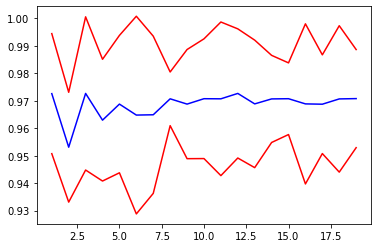

In [28]:
plt.plot(df_scores['n_neighbours'], 
         df_scores['limite_inferior'], 
         color = 'r'
        )
plt.plot(df_scores['n_neighbours'], 
         df_scores['score_medio'], 
         color = 'b'
        )
plt.plot(df_scores['n_neighbours'], 
         df_scores['limite_superior'], 
         color = 'r'
        );

####  <span style = "color:red">Código Original.</span>
<!---
plt.plot(df_scores['n_neighbours'],df_scores['limite_inferior'],color = 'r')
plt.plot(df_scores['n_neighbours'],df_scores['score_medio'],color = 'b')
plt.plot(df_scores['n_neighbours'],df_scores['limite_superior'],color = 'r');
-->

#### Vamos agora importar a biblioteca [`sklearn.preprocessing.StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) para padronizar nossos atributos centralizarlos em suas médias e medí-los em termos de seu desvio padrão.

#### Depois da padronização vamos ajustá-los com a função [`.fit_transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform), que ajusta os dados e retorna uma versão transformada dos mesmos.

In [29]:
# O número ideal de vizinhos é 3

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

#print(X_train_std[:,1])
#print(X_train_std)

####  <span style = "color:red">Código Original.</span>
<!---
# O número ideal de vizinhos é 3

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

#print(X_train_std[:,1])
#print(X_train_std)
-->

#### Uma vez que padronizamos os atributos do conjunto de dados de treino `X_train`, vamos aplicar a função [`.std()`](https://numpy.org/doc/1.18/reference/generated/numpy.std.html) a este subconjunto para calcular o desvio padrão ao longo do eixo especificado.

In [30]:
np.std(X_train_std[:,1])

0.9999999999999999

####  <span style = "color:red">Código Original.</span>
<!---
np.std(X_train_std[:,1])
-->

#### Instanciamos um novo objeto `model` para receber o modelo de classificação [`kNN`](https://towardsdatascience.com/knn-algorithm-what-when-why-how-41405c16c36f), agora com um número de vizinhos definido como `n_neighbors = 3`, para isso usamos a função [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

In [31]:
model = KNeighborsClassifier(n_neighbors = 3)

####  <span style = "color:red">Código Original.</span>
<!---
model = KNeighborsClassifier(n_neighbors = 3)
-->

#### O modelo, com os subconjuntos de treino `X_train_std`, padronizado e `y_train`, deve se então ajustado.

In [32]:
model.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=3)

####  <span style = "color:red">Código Original.</span>
<!---
model.fit(X_train_std, y_train)
-->

#### Padronizamos e transformamos também o subconjunto de teste `X_test` e aplicando novamente a função a função [`.fit_transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform), que ajusta os dados e retorna uma versão transformada dos mesmos.

In [33]:
X_test_std = scaler.transform(X_test)

####  <span style = "color:red">Código Original.</span>
<!---
X_test_std = scaler.transform(X_test)
-->

#### Refazemos nossas previsões com a função [`.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict) aplicada ao subconjunto padronizado de teste  `X_test_std` para validar nosso modelo.

In [34]:
y_pred = model.predict(X_test_std)

####  <span style = "color:red">Código Original.</span>
<!---
y_pred = model.predict(X_test_std)
-->

#### E medimos a acurácia de nosso modelo com a função [`accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) aplicada aos subconjuntos `y_test` e `y_pred`.

In [35]:
accuracy_score(y_test, y_pred)

0.9707602339181286

####  <span style = "color:red">Código Original.</span>
<!---
accuracy_score(y_test, y_pred)
-->

###  <span style = "color:blue">Prática Independente.</span>
<!---
-->

#### Importe as bibliotecas necessárias para realizar uma regressão logística com os dados do arquivo anexo `market.csv`.

#### Investigue a natureza do dataset e os tipos dos atributos de target.

#### Estude as medidas centrais do dataset e crie uma matriz de correlação em um mapa de calor.

#### Crie os vetores de atributos descritivos e de target.

#### Use os métodos da biblioteca `statsmodel` para realizar a regressão logística, crie uma coluna unitária extra, divida os vetores de atributos descritivos e de target em subconjuntos de treino e teste.

#### Instancie um objeto para receber a regressão logística, faça o ajuste dos dados de treino e apresente o sumário das informações de ajuste.

#### Realize suas previsões e construa uma matriz de confusão para comparar os atributos previstos com aqueles observados. Por fim, teste a acurácia de seu modelo.